# Predizione del prezzo di un volo aereo

**Progetto di Programmazione di Applicazioni Data Intensive - 2022/2023**  
Ingegneria e Scienze Informatiche  
Università di Bologna, Cesena

Silvia Furegato - 977475  
silvia.furegato@studio.unibo.it

---
## Obiettivo
L'obbiettivo di questo progetto è quello di predire il prezzo di un volo in base alle sue caratteristiche.

## Caricamento delle librerie

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

---
## Caricamento ed analisi dei dati
Cominciamo caricando un dataset sui voli ottenuto da [Kaggle](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction) ed analizziamone la struttura.

In [3]:
import os.path as os

file = "Flight_Prices.csv";

if not os.exists(file):
    print("Missing dataset!");

dataset = pd.read_csv(file, index_col=0)

In [4]:
dataset.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


In [5]:
dataset.tail(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [6]:
dataset.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 155.1 MB


Vediamo che non sono presenti valori nulli.  
Inoltre osserviamo che nel dataset sono presenti 300153 voli. Decidiamo quindi di ridurre le dimesioni del dataset.

In [7]:
dataset = dataset.sample(n = 100000, random_state = 11)
dataset.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 145718 to 94011
Columns: 11 entries, airline to price
dtypes: float64(1), int64(2), object(8)
memory usage: 51.7 MB


### Significato delle colonne

Nel dataset sono presenti 11 colonne:  

- `Airline`: Il nome della compagnia aerea. Nel dataset sono presenti sei compagnie diverse.  
- `Flight`: Il codice di volo dell'aereo.  
- `Source City`: Città di partenza. Sono presenti sei città diverse.  
- `Departure Time`: Momento della giornata in cui l'aereo è partito. Anche per questo campo ci sono sei valori differenti.  
- `Stops`: Numero di scali. Ci sono tre valori possibili per questo campo.  
- `Arrival Time`: Momento della giornata in cui l'aereo giunge a destinazione.  
- `Destination City`: Città di arrivo.  
- `Class`: Classe del volo. Ha due valori: Business ed Economy.  
- `Duration`: Tempo di volo in ore.  
- `Days Left`: Quanti giorni prima del volo è stato acquistato il biglietto aereo.  
- `Price`: Prezzo del biglietto.  

La variabile che cercheremo di predire è `Price`.

Il codice del volo (`flight`) non è significativo, in quanto dipende dalla compagnia aerea e dalle città di partenza ed arrivo quindi lo elimineremo. Inoltre il campo `Arrival Time` può essere facilmente desunto da `Departure time` e `Duration`, quindi elimineremo anche quello.

In [8]:
dataset = dataset.drop(columns=["flight", "arrival_time"])
dataset.head(2)

,airline,source_city,departure_time,stops,destination_city,class,duration,days_left,price
145718,AirAsia,Kolkata,Evening,two_or_more,Hyderabad,Economy,13.00,30,4589
104513,AirAsia,Bangalore,Early_Morning,one,Kolkata,Economy,13.33,15,5176


In [ ]:
#rinomina colonne se serve

Sono presenti molte colonne di tipo object, trasformiamole in tipo categorico.

In [9]:
categorical_fields = ["airline", "source_city", "departure_time", "stops", "destination_city", "class"];

for field in categorical_fields:
    dataset[field] = dataset[field].astype("category")

In [10]:
dataset.dtypes

airline             category
source_city         category
departure_time      category
stops               category
destination_city    category
class               category
duration             float64
days_left              int64
price                  int64
dtype: object

In [11]:
dataset.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 145718 to 94011
Columns: 9 entries, airline to price
dtypes: category(6), float64(1), int64(2)
memory usage: 3.6 MB


Come possiamo vedere, l'utilizzo di memoria è diminuito drasticamente.  
Vediamo ora alcune statistiche sui campi numerici.

In [12]:
dataset.describe()

,duration,days_left,price
count,100000.000000,100000.000000,100000.000000
mean,12.217848,26.054860,20969.254290
std,7.194303,13.573797,22758.422346
min,0.830000,1.000000,1105.000000
25%,6.750000,15.000000,4784.000000
50%,11.250000,26.000000,7426.000000
75%,16.170000,38.000000,42521.000000
max,47.750000,49.000000,114705.000000


In [13]:
#conteggio records e num per ogni categoria?

In [14]:
#quali sono categoriche? continue?

### Analisi esplorativa

Ora osserviamo le distribuzioni dei valori delle variabili categoriche.

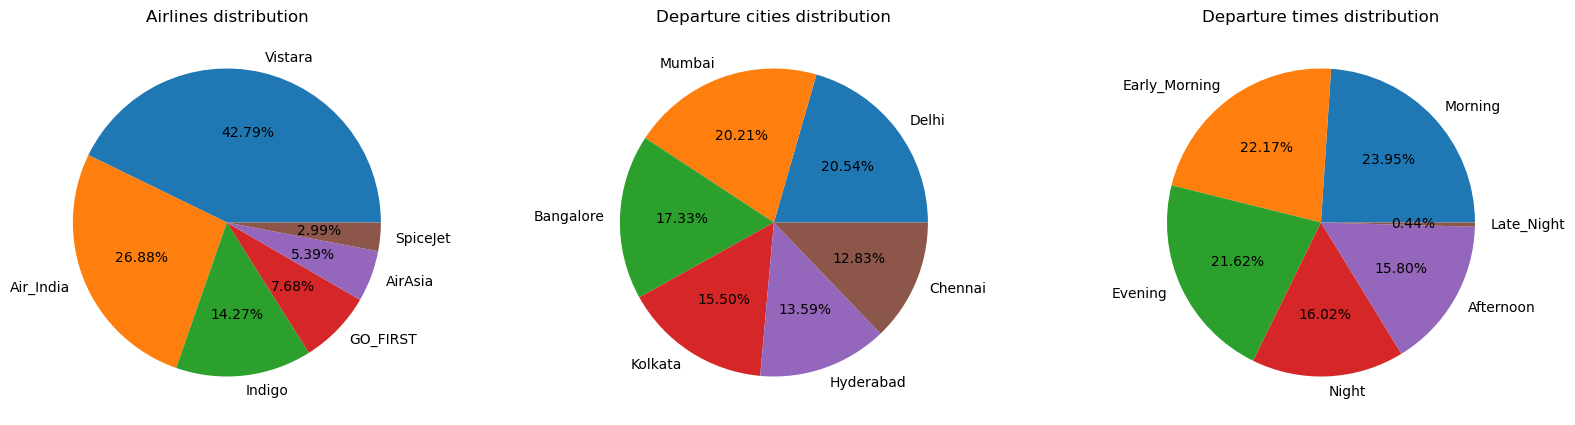

In [25]:
airline_values = dataset["airline"].value_counts()
dep_city_values = dataset["source_city"].value_counts()
time_values = dataset["departure_time"].value_counts()

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1).pie(airline_values, labels = airline_values.index, autopct='%2.2f%%')
plt.title('Airlines distribution');

plt.subplot(1, 3, 2).pie(dep_city_values, labels = dep_city_values.index, autopct='%2.2f%%')
plt.title('Departure cities distribution');

plt.subplot(1, 3, 3).pie(time_values, labels = time_values.index, autopct='%2.2f%%')
plt.title('Departure times distribution');

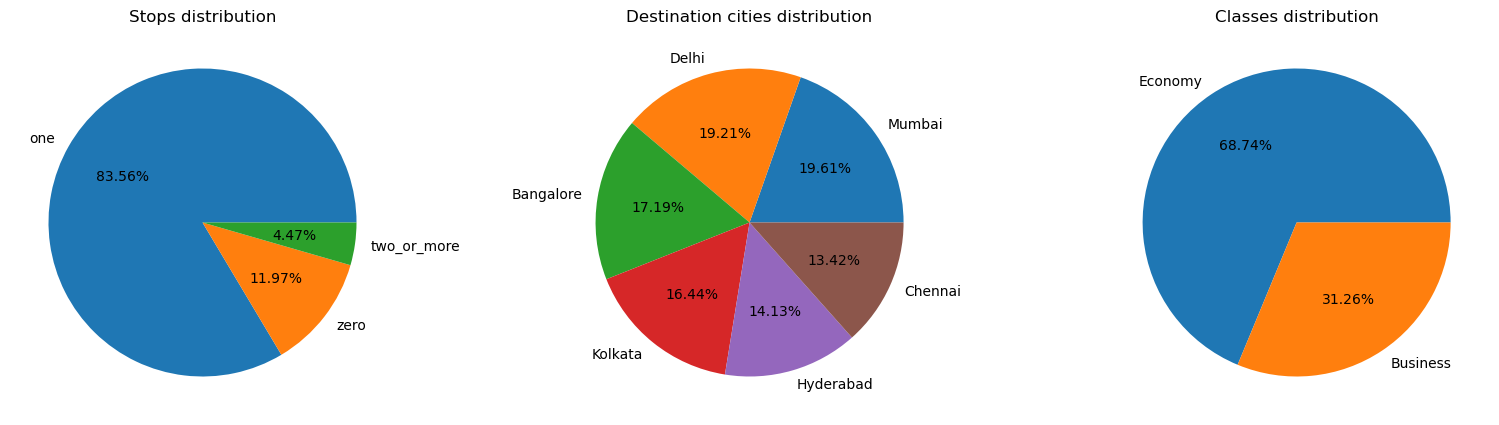

In [14]:
stops_values = dataset["stops"].value_counts()
dest_city_values = dataset["destination_city"].value_counts()
class_values = dataset["class"].value_counts()

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1).pie(stops_values, labels = stops_values.index, autopct='%2.2f%%')
plt.title('Stops distribution');

plt.subplot(1, 3, 2).pie(dest_city_values, labels = dest_city_values.index, autopct='%2.2f%%')
plt.title('Destination cities distribution');

plt.subplot(1, 3, 3).pie(class_values, labels = class_values.index, autopct='%2.2f%%')
plt.title('Classes distribution');

Confronto fra prezzo e compagnia aerea

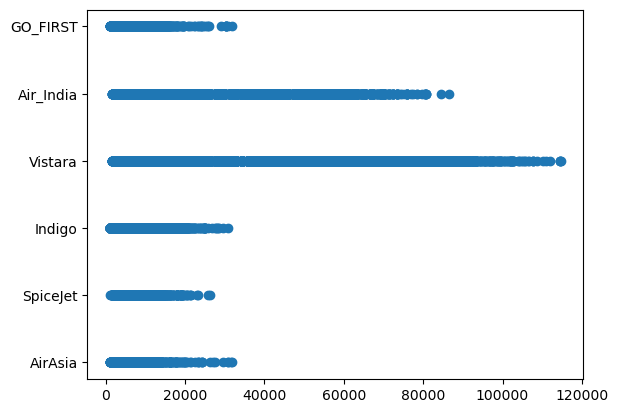

In [15]:
plt.scatter(x = dataset["price"], y = dataset["airline"])

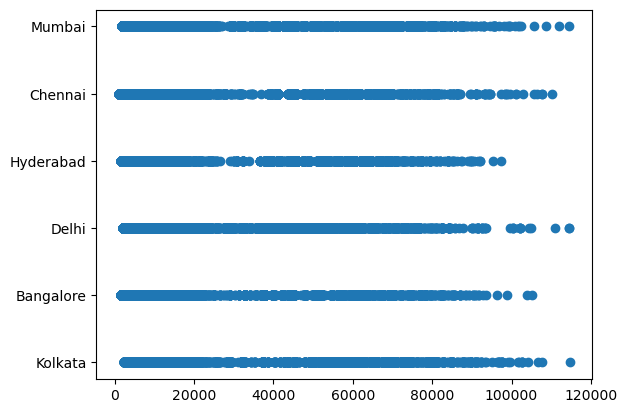

In [16]:
plt.scatter(x = dataset["price"], y = dataset["source_city"])

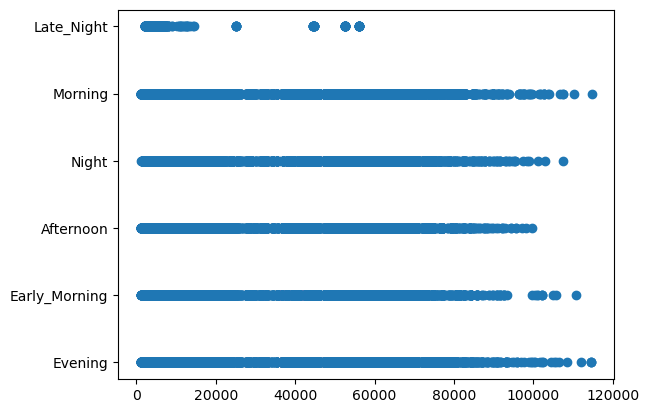

In [17]:
plt.scatter(x = dataset["price"], y = dataset["departure_time"])

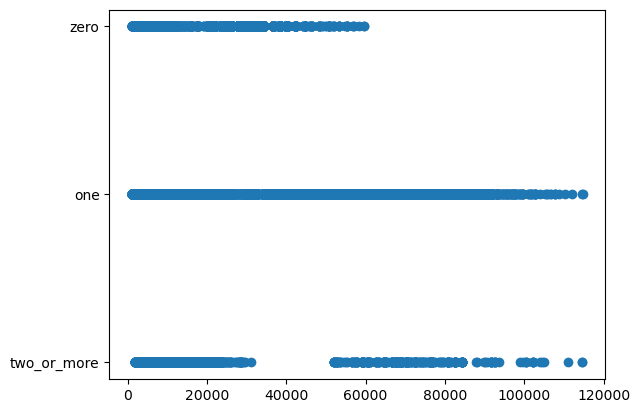

In [18]:
plt.scatter(x = dataset["price"], y = dataset["stops"])

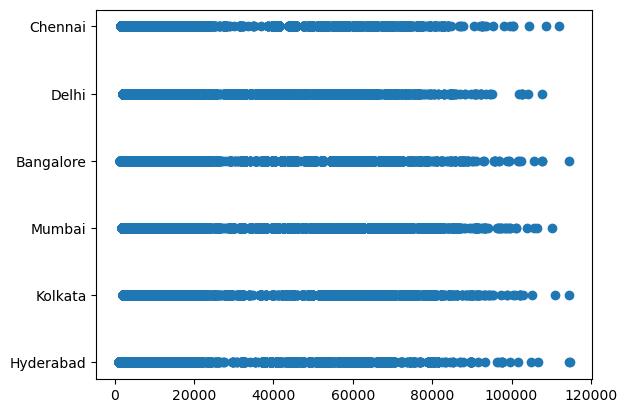

In [19]:
plt.scatter(x = dataset["price"], y = dataset["destination_city"])

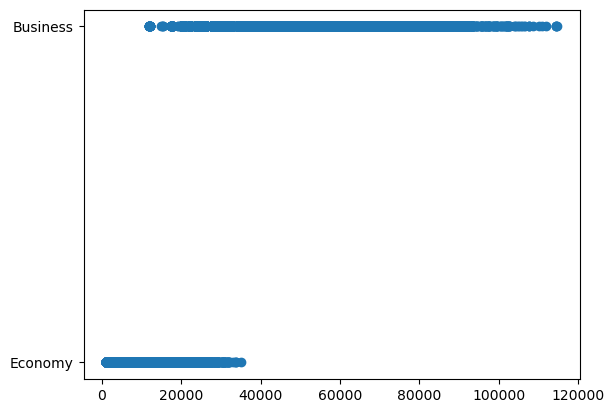

In [20]:
plt.scatter(x = dataset["price"], y = dataset["class"])

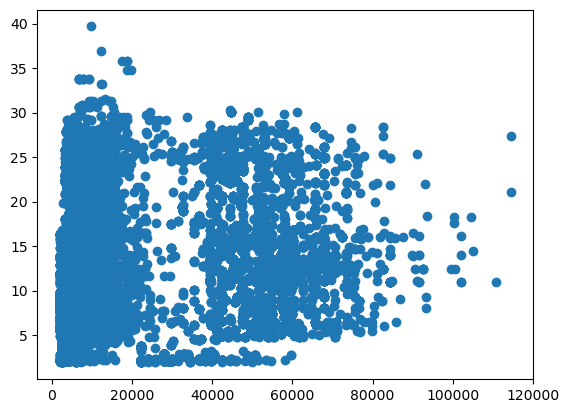

In [22]:
plt.scatter(x = dataset[dataset["source_city"] == "Delhi"] ["price"], y = dataset[dataset["source_city"] == "Delhi"]["duration"])

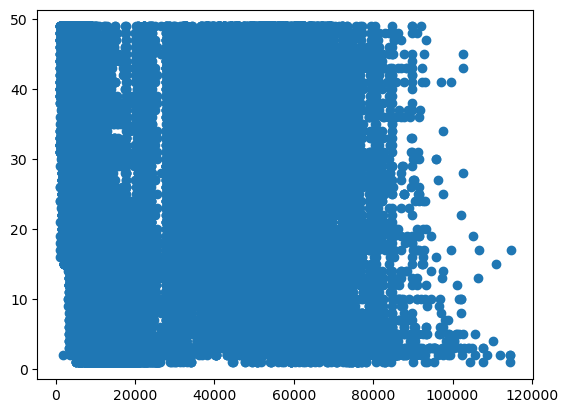

In [21]:
plt.scatter(x = dataset["price"], y = dataset["days_left"])

---
## Preparazione dei dati

In [57]:
# Import delle librerie necessarie
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

Dividiamo il dataset in training set e test set.

In [58]:
x = dataset.drop(columns="price")
y = dataset["price"]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state = 11)

Avevamo precedentemente raccolto le variabili categoriche in una lista, raccogliamo anche quelle numeriche così da poter utilizzare un preprocessing personalizzato per ciascuna tipologia di dato.

In [59]:
numeric_fields = ["duration", "days_left"]

Definiamo anche una funzione che ci permetta di valutare l'accuratezza dei modelli.

In [67]:
def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))


def print_eval(X, y, model):
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    re = relative_error(y, preds)
    r2 = r2_score(y, preds)
    print(f"   Mean squared error: {mse:.5}")
    print(f"       Relative error: {re:.5%}")
    print(f"R-squared coefficient: {r2:.5}")

### Addestramento dei modelli

Procederemo testando diversi modelli, cercando quello che avrà l'accuratezza maggiore nel trovare i prezzi dei voli.  
In particolare utilizzeremo:  
- Regressione lineare
- Regressione ridge
- Regressione lasso
- Regressione elastic net
- XGBoost Regressor
  
    
+ **KernelRidge Regression**
+ **Regression Trees**
+ **Random Forest Regressor**
- Decision Tree Regression


In [73]:
# Import librerie necessarie
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

kf = KFold(5, shuffle=True, random_state=42)

**Regressione Lineare**

In [77]:
preprocessor = ColumnTransformer([
    ("categorical", OneHotEncoder() , categorical_fields),
    ("poly", PolynomialFeatures(include_bias=False), numeric_fields),
    ("numeric"    , StandardScaler(), numeric_fields)
])

linreg = Pipeline([
    ("preproc", preprocessor),
    ("regr"   , LinearRegression())
])

grid = {
    "preproc__poly__degree": [1, 2, 3],
}

gs = GridSearchCV(linreg, grid, cv=kf)
gs.fit(x_train, y_train);

print("TRAINING SET:")
print_eval(x_train, y_train, gs)
print("----------------------------------")
print("VALIDATION SET:")
print_eval(x_val, y_val, gs)

gs.best_params_

TRAINING SET:
   Mean squared error: 4.3878e+07
       Relative error: 45.13194%
R-squared coefficient: 0.91518
----------------------------------
VALIDATION SET:
   Mean squared error: 4.445e+07
       Relative error: 45.69757%
R-squared coefficient: 0.91443


{'preproc__poly__degree': 3}